# A Multi-Criterion Evaluation Raster for Healthcare Access in New York City

* **Authors:** Kaia Chapman

* **Student ID:** 220004460

* **Date:** 11/12/2024

**Abstract:**

Inequality in access to healthcare is a major issue. This access inequality is not only racial or class-based, but also divided spatially. A study of vulnerable populations in New York City (NYC) was undertaken to trial a Geographic Information Systems (GIS)-based method of identifying high risk areas. Based on the Multi-Criterion Evaluation raster produced, it appears that the areas most at risk for experiencing difficulty accessing healthcare are concentrated in upper Manhattan, the Bronx, and some parts of Brooklyn. This method requires further refinement and is limited by availability of data, but shows promise for further research.

**Keywords:** Hospitals, NYC, Healthcare, Public health

# GitHub Repository
- **GitHub Link:** https://github.com/Semper-code/GG3209_Final_Project

## Declaration

> In submitting this assignment, I hereby confirm that I have read the University's statement on Good Academic Practice. The following work is my own. Significant academic debts and borrowings have been properly acknowledged and referenced.


**Table of Contents:**

* Introduction
* Methodology
* Results
* Discussion
* Conclusion


## Introduction

In many parts of the world, significant inequalities exist with regards to healthcare access. In the United States, the COVID-19 pandemic brought these inequalities into focus; studies such as Jaffe et al. (2020) demonstrate how COVID-19 cases and deaths were not evenly distributed across the population. Disabled people, Black people, and those with pre-existing health conditions were affected by the pandemic at a disproportionate rate. Socio-economic status also factors into these inequalities; health outcomes are frequently worse for areas living in poverty (Wagstaff, 2002). Jaffe et al. find that areas with higher rates of poverty had higher rates of death from COVID-19, even when rates of infection were lower. It is clear that healthcare and the accessibility thereof are relevant issues in the modern day.

This paper takes as a case study New York City (NYC) and aims to analyse access to healthcare from a spatial perspective by identifying areas within the city most in need of a hospital using a Multi-Criteria-Evaluation raster (MCE). The choice of location was made for several reasons. NYC is the largest city in the United States by population (US Census Bureau, 2023). It is a racially and socioecomomically diverse city with significant health disparities across races (Gusmano, Rodwin, and Weisz, 2017). These differences are not merely racial, but also manifested in space as segregation of neighbourhoods reinforces patterns of health disparities. Therefore, a geographical analysis of these healthcare access disparities is uniquely suitable. Finally, spatial data for NYC are widely available from sources such as the NYC Spatial Data Repository. Such an analysis is thus not only suitable but also possible.<br>

The issue of health is a complex one. A multitude of factors affect health outcomes, including but not limited to housing insecurity (Linton et al., 2021), pollution (Fuller et al., 2022), race (Gusmano, Rodwin, and Weisz, 2017), socio-economic status (Wagstaff, 2002), and disability (van Kessel et al., 2022). Populations may be rendered vulnerable by any or all of these. This paper will focus on identifying vulnerable populations within NYC and investigating how these vulnerabilities intersect with the placement of hospitals. In short, which neighbourhoods in NYC are the most vulnerable to health concerns such as COVID-19, and how does this compare to access to healthcare? This study aims to identify areas which are in greatest need of easy hospital access yet do not have this ease of access.


## Methodology

In order to create an MCE for healthcare access in NYC, first the relevant criteria needed to be identified. These criteria are based on two constraints: relevance of criteria and availability of data. Below, the factors and constraints are identified, accompanied by the justification for their inclusion.

**Factors and weighting:**<br>
Three factors are evident from the research above: rate of disability, rate of poverty, and percentage of non-white residents (broken down by census tract). These are crucial factors in identifying vulnerable populations, as shown by the work of Abedi et al. (2021); health inequalities for these populations have been identified by multiple studies (e.g. Wagstaff, 2002; Bocour and Tria, 2016). One more minor factor will also be considered here: population density, which was associated with higher rates of COVID-19 infections in Abedi et al.'s study. Therefore, the list of factors in consideration and their weighting is as follows:<br>
1. Rate of poverty: 20%
2. Non-white population: 40%
3. Rate of disability: 30%
4. Population density: 10%

**Constraints:**<br>
The constraints used in this analysis are simple; in order to identify vulnerable populations which lack easy hospital access, the areas identified must not be geographically close to a  hospital. (Multiple different distances were trialled during this study; the final distance used in analysis was 0.5 miles). Therefore, the constraints are as follows:
1. Distance from hospital (not closer than 0.5 miles)

**Data Cleaning and Initial Analysis:**

All analysis noted below was performed using a combination of QGIS and Excel.

Firstly, census tract boundaries for the state of New York were downloaded from the US Census Bureau TIGER Shapefiles index. These were clipped in QGIS using the extract by location function and a shapefile of NYC borough boundaries. Then, 2020 census data were downloaded for two factors: race and population density. (The dataset used was DP1 at the census tract level). The GEO_ID column was split into two columns in Excel, one with the 11-digit identifier for the census tract. This was used to merge the dataset with the clipped census tract geometry shapefile, creating the pop_density_vector.shp layer (all attributes which could not be merged were discarded, ensuring only areas within NYC were preserved). Using the field calculator in QGIS, a column of population density was created from the DP1_0001C column of total population and the ALAND column of land area from the TIGER shapefile). This field was named popDensity. A second merged file was created: race_vector.shp. From the field DP1_0078P, which recorded the percentage of white residents, a field of percentage of non-white residents was created (100 - DP1_0078P in the field calculator, new field name percentNW).

Data on disability and poverty rates were taken from the ACS 5-year estimates for 2020. The GEO_ID field was altered in a similar way and used to create a merged file for each of them with the census tract boundary shapefile (disability_vector.shp and poverty_vector.shp). The specific fields used were S1810_C03_001E (percent of total population with disability) and S1701_C03_001E (percent of total population living under the poverty line). For each of these, values with a margin of error greater than 15% were excluded.

Data on hospital locations were taken from the NYU spatial data repository.

Each of these layers was then reprojected to EPSG:2263 NAD83 New York Long Island.

All vector layers needed to be converted to raster layers. The GDAL Rasterize (vector to raster) command was used in QGIS for the pop_density_vector layer, using the following settings:
1. Burn in field: popDensity
2. Output extent: not set
3. Raster units: Georeferenced units (30 by 30)
4. Nodata value: -99

All further layers used the same settings, with the change that the output extent was set to pop_density_raster and the burn in field changed. For the disability layer the field used for the burn in value was S1810_CO3. For the race layer, the field used for the burn in value was percentNW. For poverty, the burn in field was S1701_C03. A new burn in field named rasterID was created for the hospital layer with all values set to 1, which was then converted to a raster layer via the same process, except with nodata set to the default 0. Then, the GDAL Proximity (raster distance) function was used to create a layer representing distance from a hospital, which was saved as hospital_distance.

**Creating Factor Layers:**<br>From these layers, normalised factor layers were created. A normalisation function was created for each using their min and max values, which was then applied in the raster calculator. The functions are below:<br>
1. Poverty y = x/80 + 0
2. Race y = x/100 + 0
3. Disability y = x/95 + 0
4. Population density y = x*9.17 - 0.009

As can be seen, all layers were normalised such that the highest value for the original layer was set to 1 and the lowest value was set to 0. The normalised layers were then saved as F1, F2, F3, and F4, in the order listed above.

**Visualising factor layers:**<br>Below are code cells with the python code to produce a simple visualisation of the factor layers, each of which were uploaded to my Google drive prior to this.

In [4]:
## Setup
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install contextily mapclassify

In [6]:
## Importing libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import contextily as ctx
import rasterio as rio
from rasterio import plot
from rasterio.plot import show
from rasterio.plot import show_hist
plt.rcParams['figure.figsize'] = [10, 8]

In [7]:
## Opening raster files
F1 = rio.open('/content/drive/MyDrive/Colab Notebooks/GG3209_Final_Project/F1.tif')
F2 = rio.open('/content/drive/MyDrive/Colab Notebooks/GG3209_Final_Project/F2.tif')
F3 = rio.open('/content/drive/MyDrive/Colab Notebooks/GG3209_Final_Project/F3.tif')
F4 = rio.open('/content/drive/MyDrive/Colab Notebooks/GG3209_Final_Project/F4.tif')

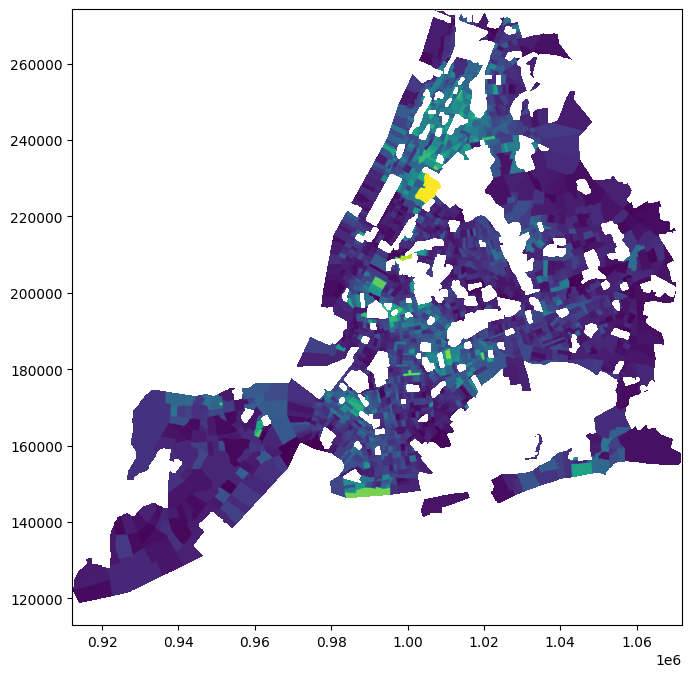

<Axes: >

In [9]:
## Visualising layers
show((F1))

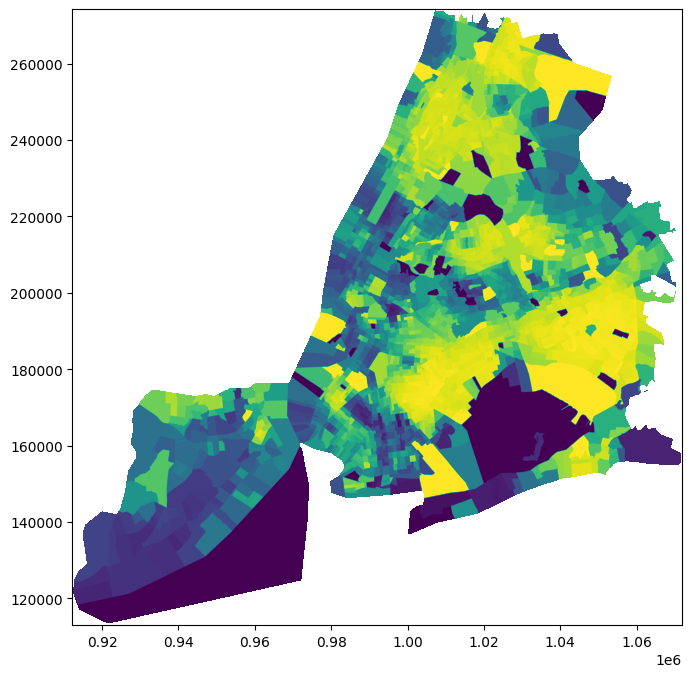

<Axes: >

In [10]:
show((F2))

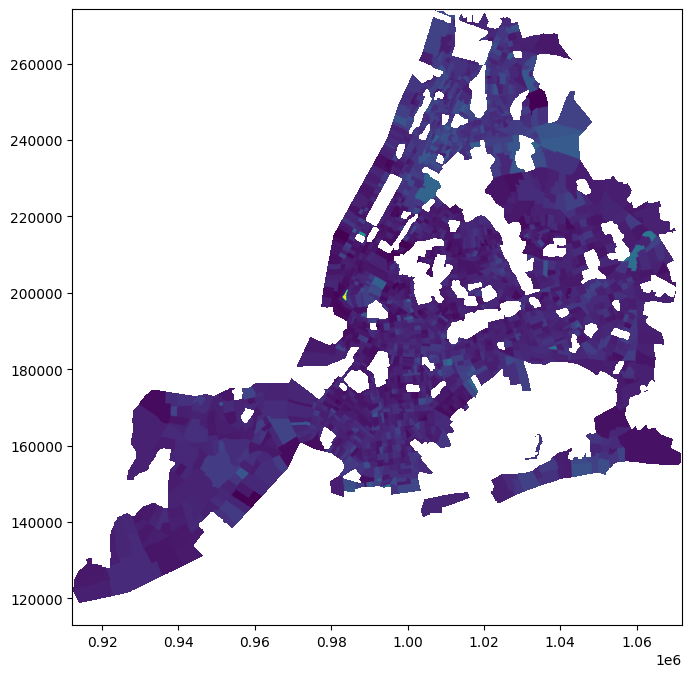

<Axes: >

In [11]:
show((F3))

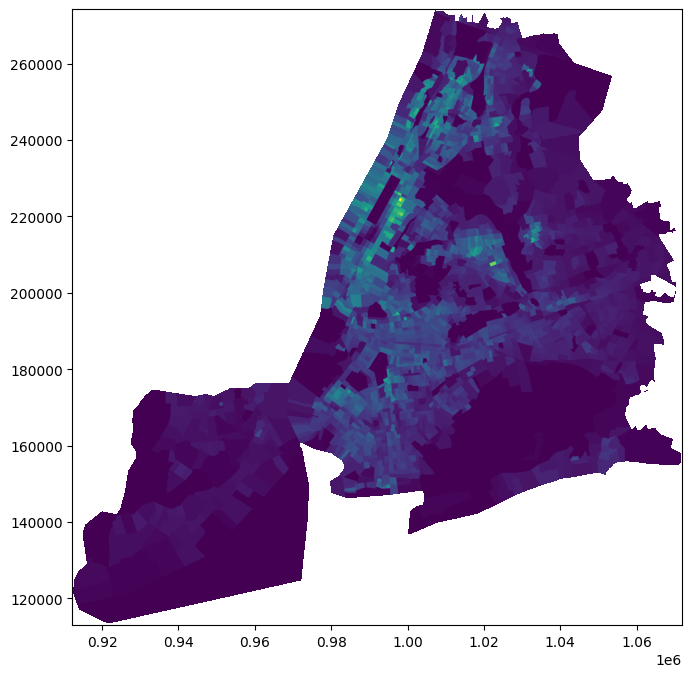

<Axes: >

In [12]:
show((F4))

**Creating Constraint Layers:**<br>The constraint layer was generated from hospital_distance layer, using the raster calculator with the function ">2640" to set all cells with a distance greater than 1/2 mile from the nearest hospital to 1, and all other cells to 0. This was then saved as C1.

**Visualising Constraint Layers:**<br>Below is the code used to visualise the constraint layer.


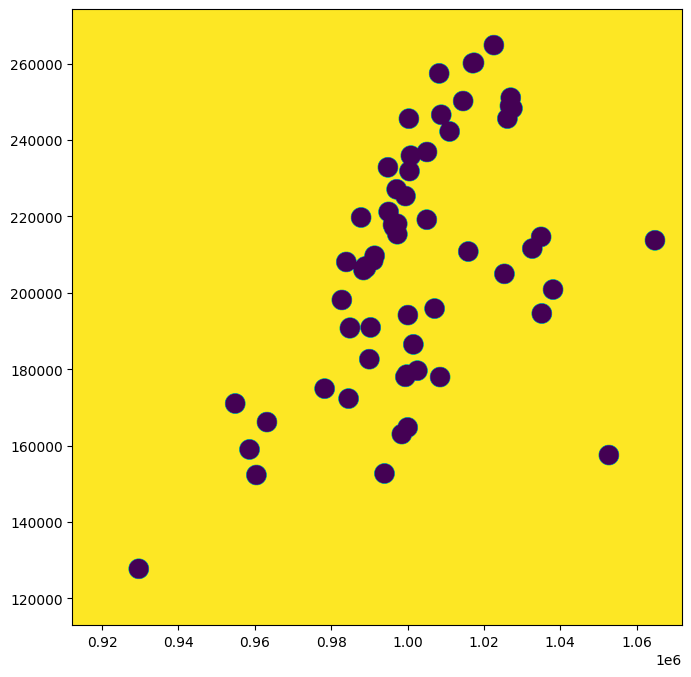

<Axes: >

In [13]:
## Visualising the layer
C1 = rio.open('/content/drive/MyDrive/Colab Notebooks/GG3209_Final_Project/C1.tif')
show((C1))

**Creating the Final MCE:**<br>The final MCE was created via a raster calculator operation, utilising the weights given to each factor layer. The equation used was ((F1x0.2)+(F2x0.4)+(F3x0.3)+(F4x0.1))*C1.

## Results (~500 words)<br>
Below is an initial visualisation of the results using rasterio. Areas coloured in yellow are the areas of highest vulnerability, while areas in purple are areas of lowest vulnerability and/or within 0.5 miles of a hospital.

In [15]:
finalresult = rio.open('/content/drive/MyDrive/Colab Notebooks/GG3209_Final_Project/NYC_MCE.tif') # Importing data

In [16]:
final_arr = finalresult.read(1) # Reading in the raster as a NumPy Array

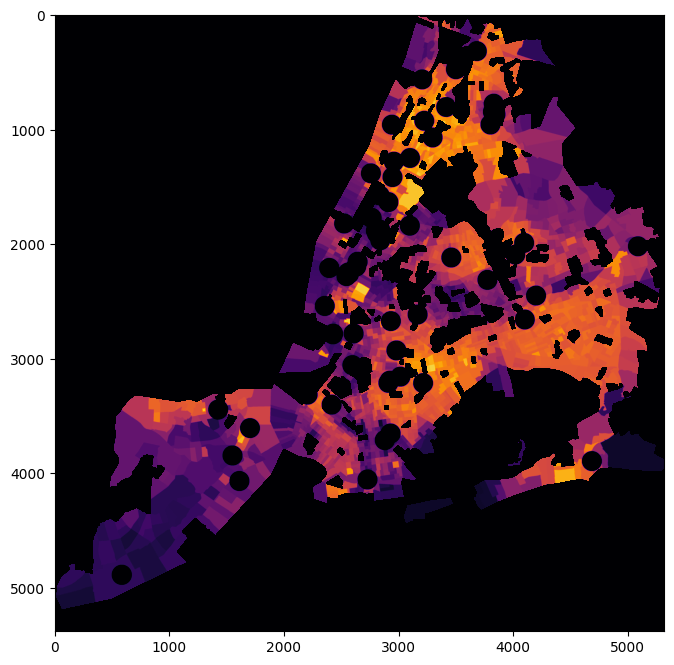

In [17]:
plt.rcParams['figure.figsize'] = [10, 8]
plt.imshow(final_arr, cmap="inferno", vmin=0.01, vmax=0.7)
# Setting vmin to 0.01 means values of 0 display as black and make the map more legible.
# Setting vmax to 0.07 is necessary as the dataset maxes out at around this value.

These initial results show that the areas of highest vulnerability are largely in the Bronx, upper Manhattan, and parts of Brooklyn. A second results raster was created with all values <0.5 excluded in order to best visualise these results. Note that show() is used instead of imshow() because it produces better results with the highly simplified raster.


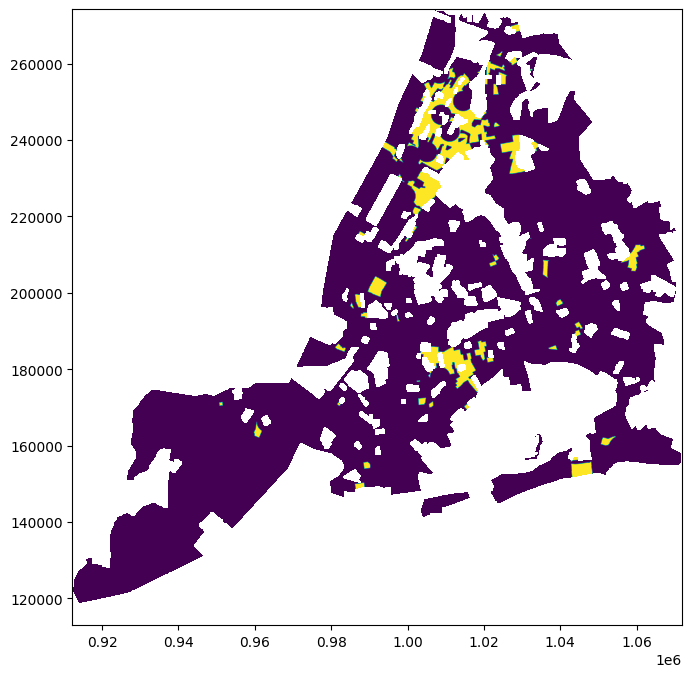

<Axes: >

In [18]:
## Visualising results raster where all values <0.5 are excluded
high_risk_raster = rio.open('/content/drive/MyDrive/Colab Notebooks/GG3209_Final_Project/high_risk_raster.tif')
show((high_risk_raster)) # Note that this basic visualisation actually produces quite a nice map

Furthermore, clustering analysis was performed on these results to see if a significant spatial pattern was present. Firstly, the high risk raster was converted to vector polygon data using the GDAL Polygonize (raster to vector) function in QGIS. This layer was extracted by expression to create a polygon layer of only high risk areas (high_risk_vector.shp). The centroids of each polygon were identified in python, and DBSCAN clustering run on the centroids. See code cell below for the execution of this and visualisation of the results.

In [19]:
## Clustering analysis
# Importing libraries
import geopandas as gpd
from sklearn.cluster import DBSCAN

In [20]:
# Reading in data
high_risk_gdf = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/GG3209_Final_Project/high_risk_vector.shp')

In [21]:
# Creating centroids
high_risk_gdf["centroidx"] = high_risk_gdf.centroid.x
high_risk_gdf["centroidy"] = high_risk_gdf.centroid.y

In [22]:
# DBSCAN clustering
dbscan1 = DBSCAN(eps=5280, min_samples=5) ## Setting eps and minimum samples.
high_risk_gdf['dbscan_cluster1'] = dbscan1.fit_predict(high_risk_gdf[['centroidx', 'centroidy']])

<Axes: >

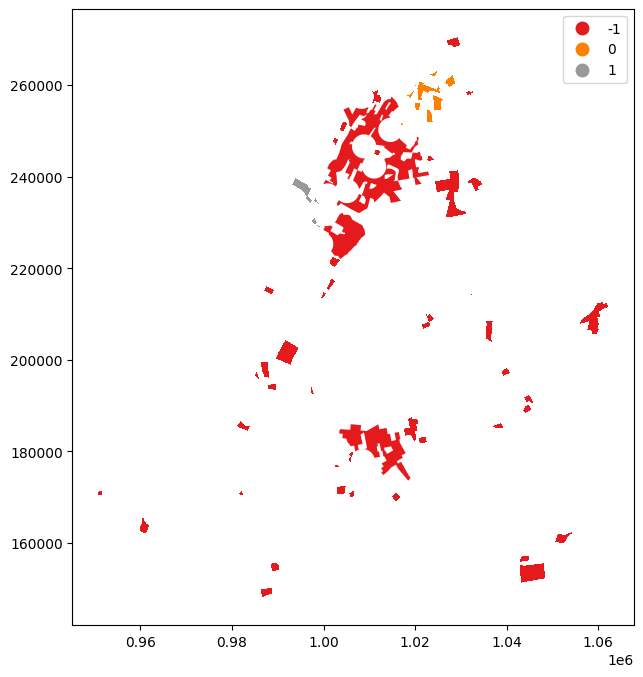

In [23]:
# Visualising results
high_risk_gdf.plot(column='dbscan_cluster1', categorical=True, legend=True, figsize=(8, 8), cmap='Set1')

Please note that the eps values required to produce meaningful results are very high for this dataset on account of the units being feet. The eps value demonstrated above is equivalent to one mile.

## Discussion (~750 words)

The results of this analysis compare to the literature in interesting ways. For example, Karpati, Bassett and McCord (2006) identified inequalities in health outcomes between NYC neighbourhoods for the periods 1989-1991 and 1999-2001. They suggest that significant inequalities in excess mortality existed between wealthier neighbourhoods and poorer ones during each of these periods. Their data on neighbourhood poverty in NYC lines up well with the outcome of this study, suggesting that either a) historically impovrished areas have remained such, thus being identified as higher risk areas in this study, b) that historically impovrished areas tend to line up with other risk factors, or c) some combination of the above. Given that these economically deprived areas also were identified as having worse health outcomes in Karpati, Bassett, and McCord's study, the results of this study suggest that areas of historic inequity have remained at a disadvantage twenty years later.

A number of other studies (e.g. Bocour and Tria, 2016; Taylor, Ahn, and Winkleby, 2006) suggest that socio-economic status (SES) is a critical factor in deaths and hospitalisations. However, these two studies have contradictory results; Bocour and Tria (2016) and Tria, Jasek, and Summers (2012) both suggest that impoverished neighbourhoods experienced the worst health outcomes. Taylor, Ahn, and Winkleby (2006) suggest that the worst health outcomes are experienced by low SES adults living in high income neighbourhoods experienced worse health outcomes than their counterparts in low income neighbourhoods. This is slightly beyond the scope of this study. However, comparing the high_risk_raster layer to the F1 layer shows that while some high risk areas are in deprived neighbourhoods, especially in the Bronx, many are not (see below), though of course this conclusion is limited as poverty is a factor in the final MCE. The focus on SES inequalities in the literature also may suggest that the poverty factor in this study deserves to be weighted more heavily.

In [24]:
high_arr = high_risk_raster.read(1)
F1_arr = F1.read(1)

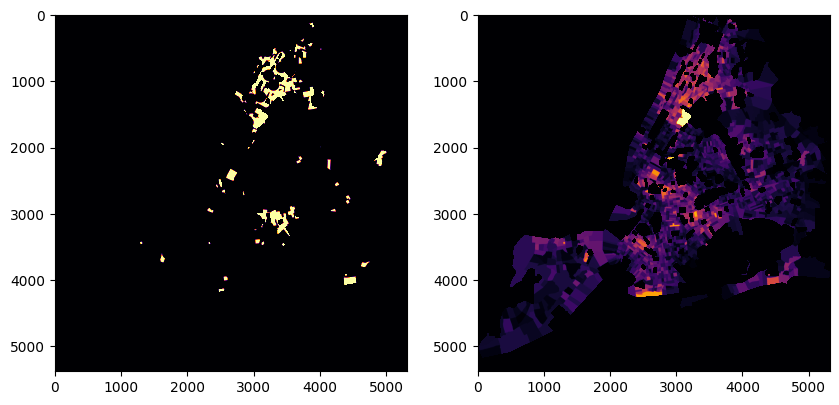

In [26]:
plt.rcParams['figure.figsize'] = [10, 8]
fig, ax = plt.subplots(1, 2)
ax[0].imshow(high_arr, cmap="inferno", vmin=0.01, vmax=0.7)
ax[1].imshow(F1_arr, cmap="inferno", vmin=0, vmax=1)

This study is of course limited. One limitation was the hospital data, which was the only spatially referenced hospital dataset available; however, it was out of date by a significant margin and did not include primary care providers or urgent care centres. Another major limitation was the difficulty and subjectivity of assigning weights to the MCE factors. The research is not always conclusive on which factors are the most important to health outcomes, hence a significant amount of subjectivity in interpretation exists. A similar study with different weights for the MCE factors may have gotten a significantly different result, which calls into question the applicability of the results. A third limitation arose from the ACS data used, as some of the margins for error were unacceptably large to be included in the study. This means that some census tracts had no data for one or more of the factors studied, and therefore vulnerable populations in those areas may have been missed. Finally, the results are limited in scope on account of time and computing constraints; there would be value in performing this study on a wider scale, but this is only a trial of it for one city.

Many of these limitations reveal potential areas for further research. The techniques trialled here could be applied in many major cities, provided that spatial data of a reasonable quality and resolution were available. It is also worth noting that other spatial data of relevance may be available for NYC; for example, maternal mortality, HIV diagnoses, and rates of obesity (NYC Health), all of which may be useful indicators of overall population health. In order to keep the scale of this study managable, only the four factors listed in the methods section were utilised, but there is significant potential to make a more thorough study of this issue. Further research into the relative importance of the factors listed above in health outcomes would also improve the accuracy and applicability of the results.


## Conclusion (~250 words)

In conclusion, a study was set out to assess which areas in NYC were most at risk for lack of healthcare access, as health inequalities in the United States persist across racial and economic groups. This study trialled a method for assessing at-risk areas which involves the creation of a MCE with five factors (poverty rate, non-white population, disabled population, population density, and air quality) and one constraint (distance from hospital). The results from this study were then visualised using Python. They showed that [INTERPRET RESULTS HERE], a conclusion which is [consistent with/contradictory to] other studies in the literature. [be specific here].

Several important limitations of this method were also identified; its applicability is limited by the quality and availability of spatial data. (With regards to even this case study of NYC, a well-studied city with significant resources, there was one dataset of questionable accuracy.) It is also difficult to take other factors and measures of health into account, and the assignment of weights to factors is somewhat subjective. However, this method may still serve as a basis for further study in this area; GIS analysis of this issue provides a uniquely spatial perspective which can be crucial.


## Appendix


**Other recommended values for DBSCAN clustering:**

The DBSCAN clustering performed above will produce meaningful results with a range of values. Below are a few more suggested values which may be interesting to explore and one simple option for visualising the analysis.

In [ ]:
dbscan2 = DBSCAN(eps=2640, min_samples=3) # eps=0.5 miles
dbscan3 = DBSCAN(eps=7920, min_samples=8) # eps=1.5 miles, with a higher min_samples to avoid overclustering
dbscan4 = DBSCAN(eps=6500, min_samples=5) # Provides visually intuitive results
dbscan5 = DBSCAN(eps=5280, min_samples=7) # eps=1 mile, with a higher min_samples to investigate larger clusters.
high_risk_gdf['dbscan_cluster2'] = dbscan2.fit_predict(high_risk_gdf[['centroidx', 'centroidy']])
high_risk_gdf['dbscan_cluster3'] = dbscan3.fit_predict(high_risk_gdf[['centroidx', 'centroidy']])
high_risk_gdf['dbscan_cluster4'] = dbscan4.fit_predict(high_risk_gdf[['centroidx', 'centroidy']])
high_risk_gdf['dbscan_cluster5'] = dbscan5.fit_predict(high_risk_gdf[['centroidx', 'centroidy']])

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
high_risk_gdf.plot(ax=ax1, column='dbscan_cluster1', categorical=True, legend=True, figsize=(8, 8), cmap='Set1')
high_risk_gdf.plot(ax=ax2, column='dbscan_cluster2', categorical=True, legend=True, figsize=(8, 8), cmap='Set1')
high_risk_gdf.plot(ax=ax3, column='dbscan_cluster3', categorical=True, legend=True, figsize=(8, 8), cmap='Set1')
high_risk_gdf.plot(ax=ax4, column='dbscan_cluster4', categorical=True, legend=True, figsize=(8, 8), cmap='Set1')

**Closing open rasters:**

It is good practice to close open rasters to save memory. I have included a cell below to be used as needed.

In [12]:
# F1.close()
# F2.close()
# F3.close()
# F4.close()
# C1.close()
# finalresult.close()
# high_risk_raster.close()

## References
*N.B. References are split into data sources and works cited for ease of interpretation.*

**Works Cited**

Abedi, V., Olulana, O., Avula, V., Chaudhary, D., Khan, A., Shahjouei, S., Li, J. and Zand, R. (2021) 'Racial, economic, and health inequality and COVID-19 infection in the United States', *Journal of racial and ethnic health disparities*, 8, pp.732-742.

Bocour, A. and Tria, M. (2016) 'Preventable hospitalization rates and neighborhood poverty among New York City residents, 2008–2013', *Journal of Urban Health*, 93, pp.974-983.

"City and Town Population Totals: 2020–2023". United States Census Bureau, Population Division. Available at https://www.census.gov/data/tables/time-series/demo/popest/2020s-total-cities-and-towns.html [Accessed 10 Dec 2024]

Fuller, R., Landrigan, P.J., Balakrishnan, K., Bathan, G., Bose-O'Reilly, S., Brauer, M., Caravanos, J., Chiles, T., Cohen, A., Corra, L. and Cropper, M. (2022.) 'Pollution and health: a progress update', *The Lancet Planetary Health*, 6(6), pp.e535-e547.

Gusmano, M.K., Rodwin, V.G. and Weisz, D. (2017) 'Persistent inequalities in health and access to health services: evidence from New York City', *World Medical & Health Policy*, 9(2), pp.186-205.

Jaffe, D.H., Lee, L., Huynh, S. and Haskell, T.P. (2020) 'Health inequalities in the use of telehealth in the United States in the lens of COVID-19', *Population health management*, 23(5), pp.368-377.

Karpati, A.M., Bassett, M.T., McCord, C. (2006) 'Neighbourhood mortality inequalities in New York City, 1989-1991 and 1999-2001', *J Epidemiol Community Health*, 60(12), pp. 1060-4. doi: 10.1136/jech.2006.047100.

Linton, S.L., Leifheit, K.M., McGinty, E.E., Barry, C.L. and Pollack, C.E. (2021) ‘Association between housing insecurity, psychological distress, and self-rated health among US adults during the COVID-19 pandemic’, *JAMA network open*, 4(9), pp.e2127772-e2127772.

NYC Health. (no date) *GIS Data Files for Download*. Available at https://www.nyc.gov/site/doh/data/data-sets/maps-gis-data-files-for-download.page [Accessed 10 Dec 2024]

Tria, M., Jasek, J., Summers, C. (2012) 'Preventing hospitalizations in New York City', *NYC Vital Signs*, 11(3), pp. 1–4.

van Kessel, R., Hrzic, R., O'Nuallain, E., Weir, E., Wong, B.L.H., Anderson, M., Baron-Cohen, S. and Mossialos, E. (2022) 'Digital health paradox: international policy perspectives to address increased health inequalities for people living with disabilities', *Journal of medical Internet research*, 24(2), p.e33819.

Wagstaff, A. (2002) Poverty and health sector inequalities. Bulletin of the world health organization, 80, pp.97-105.

**Data sources**

*Borough outline shapefile:*<br>ArcGIS Hub. (No date) *NYC Borough Boundary*. Available at https://hub.arcgis.com/datasets/DCP::nyc-borough-boundary/explore [Accessed 9 Dec 2024]

*Census tract boundary shapefile:*<br>US Census Bureau. (No date). *TIGER/Line Shapefiles*. Available at https://www.census.gov/cgi-bin/geo/shapefiles/index.php [Accessed 9 Dec 2024]

*Disability, race, poverty, and population density data:*<br>US Census Bureau. (no date) Explore Census Data. Available at https://data.census.gov/ [Accessed 10 Dec 2024]<br>Geography: All census tracts within New York State.<br>Surveys: Decentennial Census (2020) and American Community Survey 5-year estimates (2020)<br>Datasets: DP1 (Race and population density), S1701 (Poverty), S1810 (Disability).

*Hospital shapefile:*<br>
NYU Spatial Data repository. (2016) *2015 New York City Hospitals*. Available at https://geo.nyu.edu/catalog/nyu-2451-34494 [Accessed 7 Dec 2024]